# Assignment 18 (Forecasting) Coca_Cola Dataset

## Q. Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [2]:
# Loading the Dataset
coca_cola_df = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [3]:
# Copying the Dataset in another variable
coca_cola_df1 = coca_cola_df.copy()

In [4]:
coca_cola_df1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
# Checking for null values
coca_cola_df1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
# Checking the data types of columns
coca_cola_df1.dtypes

Quarter     object
Sales      float64
dtype: object

In [7]:
# Summary Statistics
coca_cola_df1.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [8]:
temp = coca_cola_df1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

In [9]:
coca_cola_df1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')

In [10]:
coca_cola_df1.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [11]:
coca_cola_df1 = coca_cola_df1.drop(['Quarter'], axis=1)

In [12]:
coca_cola_df1.reset_index(inplace=True)

In [13]:
coca_cola_df1['quater'] = pd.to_datetime(coca_cola_df1['quater'])

In [14]:
coca_cola_df1 = coca_cola_df1.set_index('quater')

In [15]:
coca_cola_df1.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


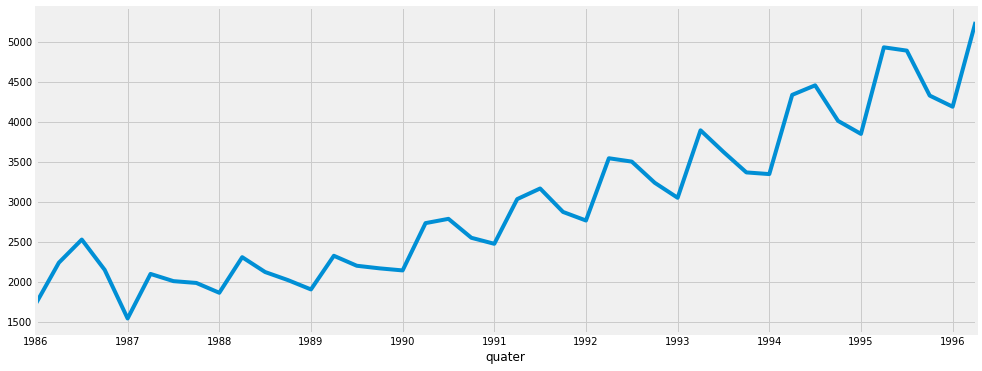

In [16]:
coca_cola_df1['Sales'].plot(figsize=(15, 6))
plt.show()

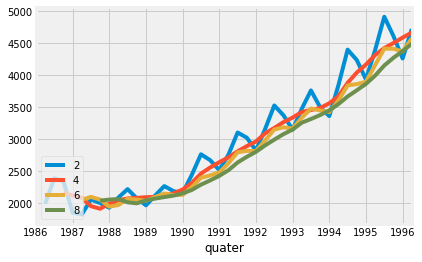

In [17]:
for i in range(2,10,2):
    coca_cola_df1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

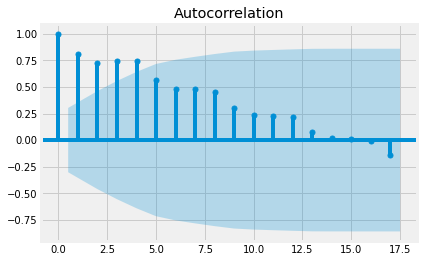

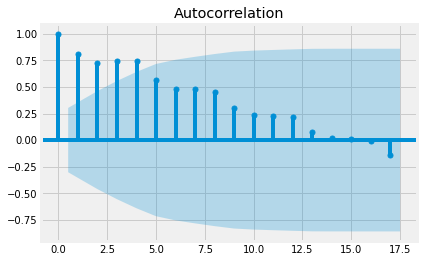

In [18]:
# Autocorrelation
tsa_plots.plot_acf(coca_cola_df1.Sales)

## Building Time Series Forecasting with ARIMA

In [19]:
x = coca_cola_df1['Sales'].values

In [20]:
size = int(len(x) * 0.66)

In [21]:
train, test = x[0:size], x[size:len(x)]

In [22]:
model = ARIMA(train, order=(5,1,0))

In [23]:
model_fit = model.fit(disp=0)

In [24]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   26
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -172.036
Method:                       css-mle   S.D. of innovations            163.191
Date:                Mon, 26 Jul 2021   AIC                            358.071
Time:                        22:33:53   BIC                            366.878
Sample:                             1   HQIC                           360.607
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8432     26.509      1.578      0.130     -10.113      93.799
ar.L1.D.y     -0.1479      0.195     -0.758      0.457      -0.530       0.234
ar.L2.D.y     -0.3127      0.157     -1.996      0.0

## This Summarizes the Coefficient values used as well as the skill of the fit on the in-sample Observations 

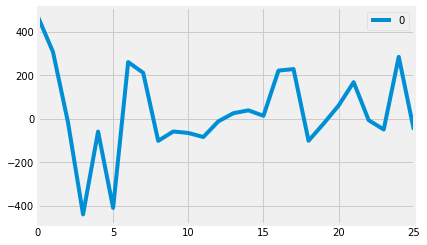

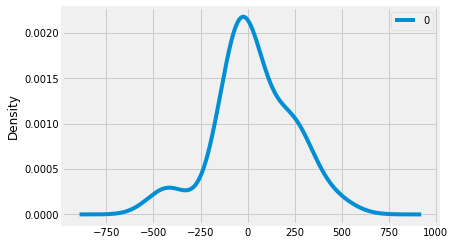

                0
count   26.000000
mean    31.326191
std    202.029669
min   -438.903622
25%    -58.602815
50%     -9.190090
75%    200.236684
max    468.290825


In [25]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

## The plot of the residual errors suggests that there may still be some trend information not captured by the model
## The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals) 

## Rolling Forecast ARIMA Model 

In [26]:
history = [x1 for x1 in train]

In [27]:
predictions = list()

In [28]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Predicted = %f, Expected = %f' % (yhat, obs))

Predicted = 3135.586015, Expected = 3243.859993
Predicted = 3188.846812, Expected = 3056.000000
Predicted = 3734.222861, Expected = 3899.000000
Predicted = 3782.619803, Expected = 3629.000000
Predicted = 3355.125069, Expected = 3373.000000
Predicted = 3297.217699, Expected = 3352.000000
Predicted = 4112.814864, Expected = 4342.000000
Predicted = 3961.042800, Expected = 4461.000000
Predicted = 4130.786084, Expected = 4017.000000
Predicted = 3912.794446, Expected = 3854.000000
Predicted = 4687.044668, Expected = 4936.000000
Predicted = 4970.517249, Expected = 4895.000000
Predicted = 4384.039520, Expected = 4333.000000
Predicted = 4207.688802, Expected = 4194.000000
Predicted = 5261.673957, Expected = 5253.000000


In [29]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 31525.270


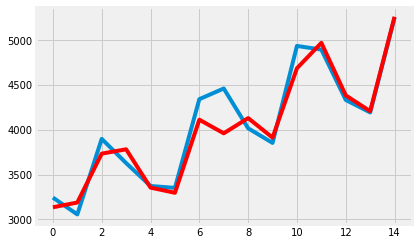

In [30]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## A line plot is created showing the Expected values (blue) compared to the rolling Forecast predictions (red). We can see the values show some trend and are in the correct scale

## Comparing Multiple Models 

In [31]:
coca_cola_df2 = pd.get_dummies(coca_cola_df, columns = ['Quarter'])

In [32]:
coca_cola_df2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']

In [33]:
coca_cola_df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
t = np.arange(1,43)

In [35]:
coca_cola_df2['t'] = t

In [36]:
coca_cola_df2['t_sq'] = coca_cola_df2['t']*coca_cola_df2['t']

In [37]:
log_Sales=np.log(coca_cola_df2['Sales'])

In [38]:
coca_cola_df2['log_Sales']=log_Sales

In [39]:
coca_cola_df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


In [40]:
train1, test1 = np.split(coca_cola_df2, [int(.67 *len(coca_cola_df2))])

In [41]:
linear = smf.ols('Sales ~ t',data=train1).fit()
predlin = pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin = np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
rmselin

580.1224130918632

In [42]:
quad = smf.ols('Sales~t+t_sq',data=train1).fit()
predquad = pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

783.729797503746

In [43]:
expo = smf.ols('log_Sales~t',data=train1).fit()
predexp = pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.1405104900199

In [44]:
additive = smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
predadd = pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmseadd

1869.7188209186938

In [45]:
addlinear = smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predaddlinear = pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

596.1526282372296

In [46]:
addquad = smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
predaddquad = pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

412.1144436052219

In [47]:
mulsea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
predmul = pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2374.919440795433

In [48]:
mullin = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predmullin = pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmsemulin = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

5359.6879119332425

In [49]:
mul_quad = smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad = pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.5619467339266

## Conclusion 

In [50]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [51]:
rmse = pd.DataFrame(output)

In [52]:
print(rmse)

           Model       Values
0  rmse_mul_quad  3630.561947
1        rmseadd  1869.718821
2  rmseaddlinear   596.152628
3    rmseaddquad   412.114444
4       rmseexpo   588.140510
5        rmselin   580.122413
6        rmsemul  2374.919441
7      rmsemulin  5359.687912
8       rmsequad   783.729798


## Additive seasonality with quadratic trend has the best RMSE value 